In [46]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [47]:
# learning parameters
batch_size = 128
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [48]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [49]:
hidden_dim = 64

class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [50]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [51]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=64, out_features=784, bias=True)
    (9): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): LeakyReLU(n

# Tools for training

In [52]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [53]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [54]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [55]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [56]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [57]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [58]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

469it [00:10, 46.27it/s]                         


Epoch 1 of 100
Generator loss: 2.25980566, Discriminator loss: 0.39344318


469it [00:09, 50.23it/s]                         


Epoch 2 of 100
Generator loss: 4.85735848, Discriminator loss: 0.12307490


469it [00:09, 47.96it/s]                         


Epoch 3 of 100
Generator loss: 3.77499615, Discriminator loss: 0.25734304


469it [00:09, 47.78it/s]                         


Epoch 4 of 100
Generator loss: 3.63143265, Discriminator loss: 0.38086545


469it [00:09, 48.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


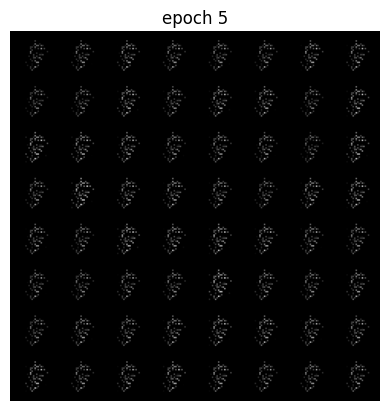

Epoch 5 of 100
Generator loss: 3.23141543, Discriminator loss: 0.39454594


469it [00:09, 47.73it/s]                         


Epoch 6 of 100
Generator loss: 3.48997320, Discriminator loss: 0.54153881


469it [00:09, 48.68it/s]                         


Epoch 7 of 100
Generator loss: 2.80720016, Discriminator loss: 0.58834168


469it [00:09, 47.42it/s]                         


Epoch 8 of 100
Generator loss: 2.75467240, Discriminator loss: 0.64678436


469it [00:09, 46.99it/s]                         


Epoch 9 of 100
Generator loss: 2.54267942, Discriminator loss: 0.65702601


469it [00:11, 40.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


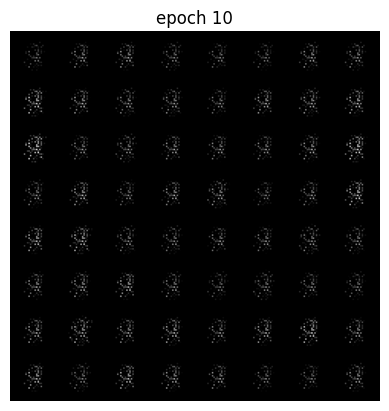

Epoch 10 of 100
Generator loss: 2.90390049, Discriminator loss: 0.65344365


469it [00:12, 39.03it/s]                         


Epoch 11 of 100
Generator loss: 2.95262538, Discriminator loss: 0.76066918


469it [00:11, 40.81it/s]                         


Epoch 12 of 100
Generator loss: 2.28088371, Discriminator loss: 0.64909844


469it [00:10, 42.77it/s]                         


Epoch 13 of 100
Generator loss: 2.10271524, Discriminator loss: 0.67682575


469it [00:11, 41.06it/s]                         


Epoch 14 of 100
Generator loss: 2.74776886, Discriminator loss: 0.53207086


469it [00:12, 38.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


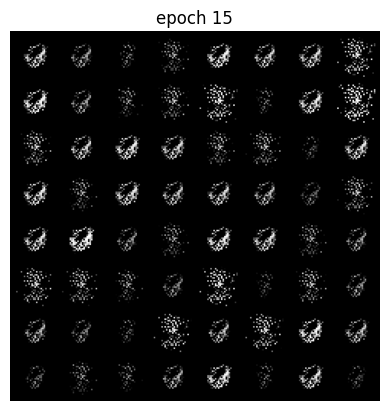

Epoch 15 of 100
Generator loss: 3.41326751, Discriminator loss: 0.49127576


469it [00:12, 37.94it/s]                         


Epoch 16 of 100
Generator loss: 3.25832527, Discriminator loss: 0.36584155


469it [00:11, 40.02it/s]                         


Epoch 17 of 100
Generator loss: 2.77563437, Discriminator loss: 0.47902044


469it [00:11, 41.59it/s]                         


Epoch 18 of 100
Generator loss: 2.84842367, Discriminator loss: 0.46202698


469it [00:11, 41.52it/s]                         


Epoch 19 of 100
Generator loss: 2.88379801, Discriminator loss: 0.49441561


469it [00:10, 45.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


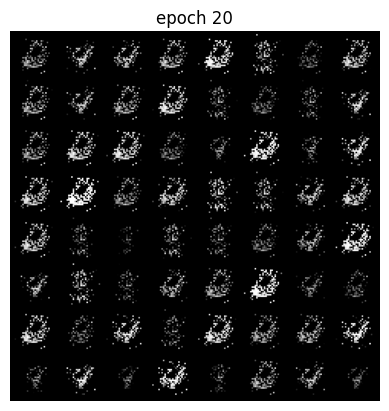

Epoch 20 of 100
Generator loss: 3.04453469, Discriminator loss: 0.44072296


469it [00:10, 44.58it/s]                         


Epoch 21 of 100
Generator loss: 3.07471131, Discriminator loss: 0.39665170


469it [00:10, 44.75it/s]                         


Epoch 22 of 100
Generator loss: 3.24953572, Discriminator loss: 0.31579519


469it [00:11, 42.27it/s]                         


Epoch 23 of 100
Generator loss: 3.40074478, Discriminator loss: 0.35959462


469it [00:12, 37.06it/s]                         


Epoch 24 of 100
Generator loss: 3.69266596, Discriminator loss: 0.36547719


469it [00:12, 38.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


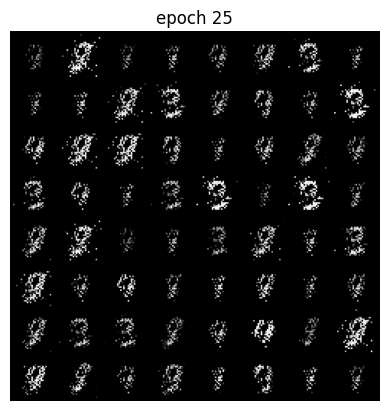

Epoch 25 of 100
Generator loss: 3.61109323, Discriminator loss: 0.38603176


469it [00:12, 38.72it/s]                         


Epoch 26 of 100
Generator loss: 3.73548408, Discriminator loss: 0.28823600


469it [00:12, 36.74it/s]                         


Epoch 27 of 100
Generator loss: 3.53176361, Discriminator loss: 0.33938200


469it [00:12, 38.07it/s]                         


Epoch 28 of 100
Generator loss: 3.61659824, Discriminator loss: 0.32153867


469it [00:12, 36.52it/s]                         


Epoch 29 of 100
Generator loss: 3.79368347, Discriminator loss: 0.33068417


469it [00:12, 37.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


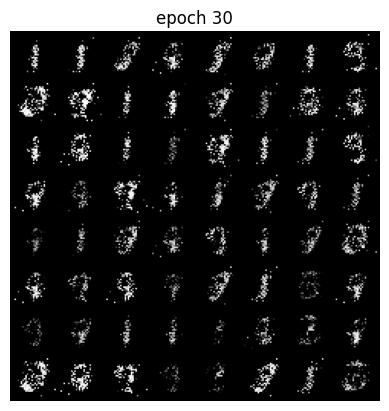

Epoch 30 of 100
Generator loss: 3.53293815, Discriminator loss: 0.31677963


469it [00:12, 37.53it/s]                         


Epoch 31 of 100
Generator loss: 3.82259028, Discriminator loss: 0.31865540


469it [00:11, 40.72it/s]                         


Epoch 32 of 100
Generator loss: 3.47270216, Discriminator loss: 0.37251585


469it [00:10, 44.86it/s]                         


Epoch 33 of 100
Generator loss: 3.30412979, Discriminator loss: 0.34169582


469it [00:10, 44.19it/s]                         


Epoch 34 of 100
Generator loss: 3.67398775, Discriminator loss: 0.35177237


469it [00:10, 43.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


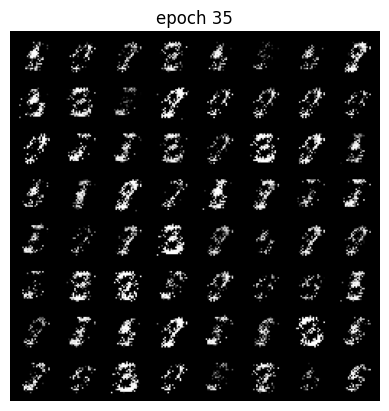

Epoch 35 of 100
Generator loss: 3.20254007, Discriminator loss: 0.37712689


469it [00:10, 43.53it/s]                         


Epoch 36 of 100
Generator loss: 3.29698539, Discriminator loss: 0.41665144


469it [00:10, 44.33it/s]                         


Epoch 37 of 100
Generator loss: 3.52912562, Discriminator loss: 0.32355740


469it [00:10, 44.14it/s]                         


Epoch 38 of 100
Generator loss: 3.34721084, Discriminator loss: 0.39257283


469it [00:10, 45.17it/s]                         


Epoch 39 of 100
Generator loss: 3.31642278, Discriminator loss: 0.34245073


469it [00:10, 44.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


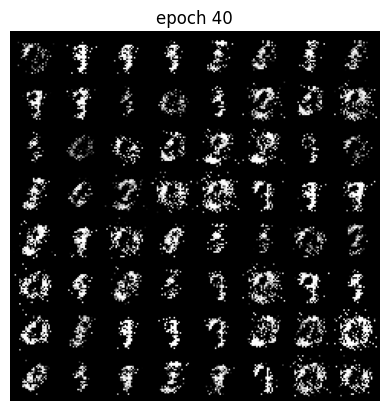

Epoch 40 of 100
Generator loss: 3.28165614, Discriminator loss: 0.38931922


469it [00:10, 42.80it/s]                         


Epoch 41 of 100
Generator loss: 3.48823582, Discriminator loss: 0.37223148


469it [00:11, 40.39it/s]                         


Epoch 42 of 100
Generator loss: 3.53637769, Discriminator loss: 0.40641896


469it [00:10, 42.92it/s]                         


Epoch 43 of 100
Generator loss: 3.37054181, Discriminator loss: 0.41739647


469it [00:10, 43.72it/s]                         


Epoch 44 of 100
Generator loss: 3.27320600, Discriminator loss: 0.40049730


469it [00:11, 41.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


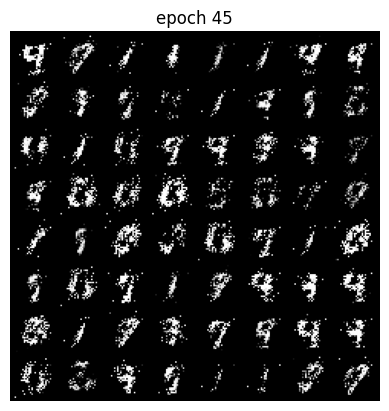

Epoch 45 of 100
Generator loss: 3.40712969, Discriminator loss: 0.37306023


469it [00:11, 40.56it/s]                         


Epoch 46 of 100
Generator loss: 2.99621556, Discriminator loss: 0.43780247


469it [00:10, 46.55it/s]                         


Epoch 47 of 100
Generator loss: 3.30457488, Discriminator loss: 0.37016381


469it [00:10, 45.84it/s]                         


Epoch 48 of 100
Generator loss: 3.32303104, Discriminator loss: 0.34073149


469it [00:10, 44.13it/s]                         


Epoch 49 of 100
Generator loss: 3.47814607, Discriminator loss: 0.33968765


469it [00:10, 43.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


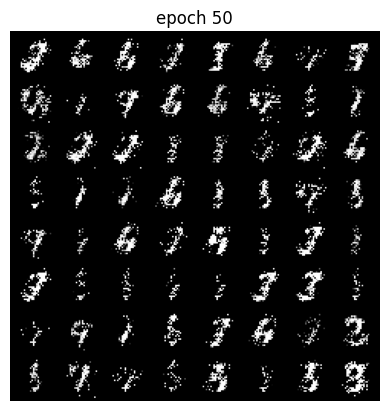

Epoch 50 of 100
Generator loss: 3.49097262, Discriminator loss: 0.36699590


469it [00:12, 36.88it/s]                         


Epoch 51 of 100
Generator loss: 3.44472766, Discriminator loss: 0.34715212


469it [00:12, 37.13it/s]                         


Epoch 52 of 100
Generator loss: 3.33831756, Discriminator loss: 0.37062551


469it [00:13, 35.90it/s]                         


Epoch 53 of 100
Generator loss: 3.29066870, Discriminator loss: 0.39551562


469it [00:12, 38.75it/s]                         


Epoch 54 of 100
Generator loss: 3.06122363, Discriminator loss: 0.38777291


469it [00:12, 38.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


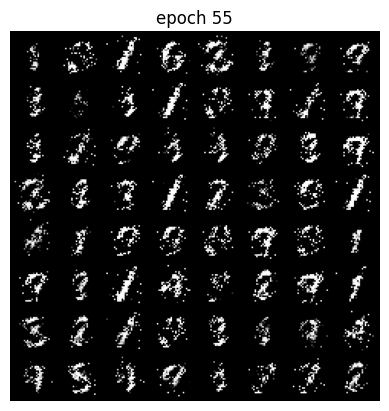

Epoch 55 of 100
Generator loss: 3.18153267, Discriminator loss: 0.40088053


469it [00:12, 36.28it/s]                         


Epoch 56 of 100
Generator loss: 3.15624003, Discriminator loss: 0.39406497


469it [00:12, 37.34it/s]                         


Epoch 57 of 100
Generator loss: 3.20686036, Discriminator loss: 0.40072908


469it [00:13, 35.01it/s]                         


Epoch 58 of 100
Generator loss: 2.80314497, Discriminator loss: 0.47425192


469it [00:13, 35.90it/s]                         


Epoch 59 of 100
Generator loss: 3.06484139, Discriminator loss: 0.42648823


469it [00:13, 35.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


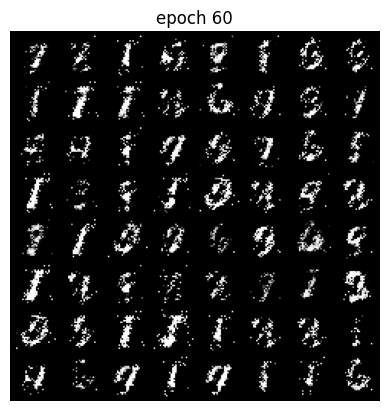

Epoch 60 of 100
Generator loss: 3.11276260, Discriminator loss: 0.41418800


469it [00:13, 35.90it/s]                         


Epoch 61 of 100
Generator loss: 2.82313200, Discriminator loss: 0.45958585


469it [00:12, 36.63it/s]                         


Epoch 62 of 100
Generator loss: 2.97099059, Discriminator loss: 0.43355521


469it [00:13, 35.70it/s]                         


Epoch 63 of 100
Generator loss: 2.99968001, Discriminator loss: 0.44311455


469it [00:12, 36.76it/s]                         


Epoch 64 of 100
Generator loss: 3.11483365, Discriminator loss: 0.39874688


469it [00:13, 35.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


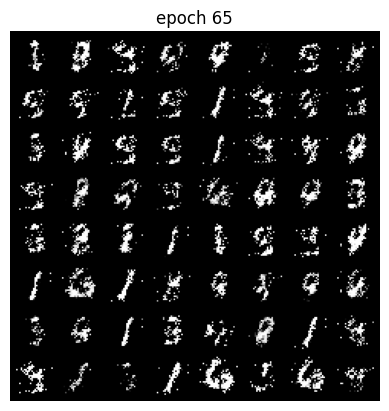

Epoch 65 of 100
Generator loss: 2.99566615, Discriminator loss: 0.45971084


469it [00:12, 36.59it/s]                         


Epoch 66 of 100
Generator loss: 2.72130932, Discriminator loss: 0.48365504


469it [00:12, 37.10it/s]                         


Epoch 67 of 100
Generator loss: 2.78959946, Discriminator loss: 0.49842870


469it [00:12, 37.31it/s]                         


Epoch 68 of 100
Generator loss: 2.57697887, Discriminator loss: 0.54410928


469it [00:12, 36.70it/s]                         


Epoch 69 of 100
Generator loss: 2.74089240, Discriminator loss: 0.48443776


469it [00:12, 36.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


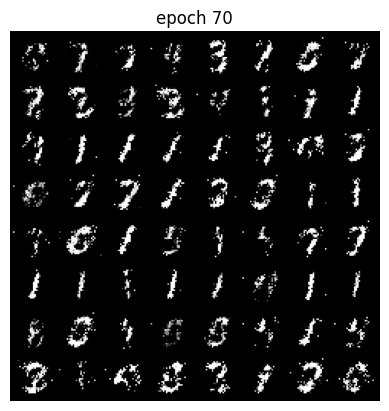

Epoch 70 of 100
Generator loss: 2.75619704, Discriminator loss: 0.52994928


469it [00:12, 37.21it/s]                         


Epoch 71 of 100
Generator loss: 2.77432126, Discriminator loss: 0.50813341


469it [00:13, 34.24it/s]                         


Epoch 72 of 100
Generator loss: 2.95259958, Discriminator loss: 0.47218184


469it [00:13, 35.43it/s]                         


Epoch 73 of 100
Generator loss: 2.60308288, Discriminator loss: 0.54906478


469it [00:13, 36.06it/s]                         


Epoch 74 of 100
Generator loss: 2.59968884, Discriminator loss: 0.51402129


469it [00:12, 36.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


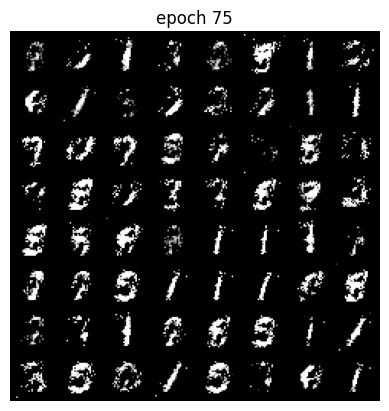

Epoch 75 of 100
Generator loss: 2.52709696, Discriminator loss: 0.54539258


469it [00:12, 36.65it/s]                         


Epoch 76 of 100
Generator loss: 2.66090818, Discriminator loss: 0.55235270


469it [00:14, 32.50it/s]                         


Epoch 77 of 100
Generator loss: 2.52444100, Discriminator loss: 0.55576286


469it [00:13, 34.32it/s]                         


Epoch 78 of 100
Generator loss: 2.54205610, Discriminator loss: 0.54331451


469it [00:13, 33.89it/s]                         


Epoch 79 of 100
Generator loss: 2.73493342, Discriminator loss: 0.49415605


469it [00:13, 33.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


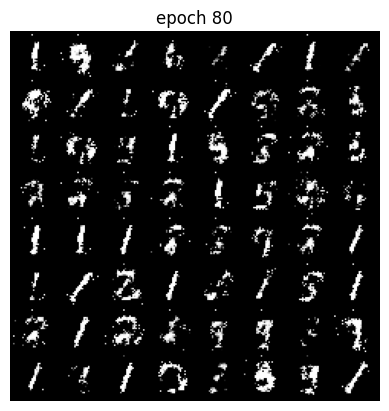

Epoch 80 of 100
Generator loss: 2.57325784, Discriminator loss: 0.54046847


469it [00:13, 34.06it/s]                         


Epoch 81 of 100
Generator loss: 2.46558256, Discriminator loss: 0.55326518


469it [00:13, 34.17it/s]                         


Epoch 82 of 100
Generator loss: 2.52929318, Discriminator loss: 0.55099896


469it [00:13, 33.92it/s]                         


Epoch 83 of 100
Generator loss: 2.53450322, Discriminator loss: 0.54438126


469it [00:13, 34.05it/s]                         


Epoch 84 of 100
Generator loss: 2.41607797, Discriminator loss: 0.56750346


469it [00:14, 32.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


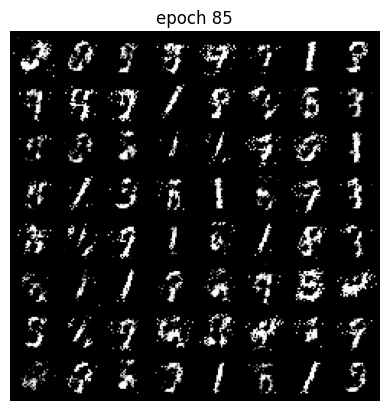

Epoch 85 of 100
Generator loss: 2.54032491, Discriminator loss: 0.57977100


469it [00:14, 33.15it/s]                         


Epoch 86 of 100
Generator loss: 2.42282199, Discriminator loss: 0.57486900


469it [00:13, 33.70it/s]                         


Epoch 87 of 100
Generator loss: 2.50515900, Discriminator loss: 0.55882431


469it [00:13, 34.06it/s]                         


Epoch 88 of 100
Generator loss: 2.40627802, Discriminator loss: 0.59497523


469it [00:13, 34.23it/s]                         


Epoch 89 of 100
Generator loss: 2.45907517, Discriminator loss: 0.57562741


469it [00:12, 36.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


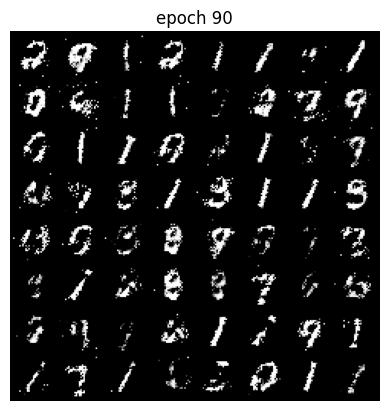

Epoch 90 of 100
Generator loss: 2.32443490, Discriminator loss: 0.61013214


469it [00:13, 35.97it/s]                         


Epoch 91 of 100
Generator loss: 2.39491842, Discriminator loss: 0.59957132


469it [00:12, 36.80it/s]                         


Epoch 92 of 100
Generator loss: 2.42266675, Discriminator loss: 0.58018762


469it [00:12, 36.92it/s]                         


Epoch 93 of 100
Generator loss: 2.34664033, Discriminator loss: 0.60799691


469it [00:12, 36.91it/s]                         


Epoch 94 of 100
Generator loss: 2.45585911, Discriminator loss: 0.61955020


469it [00:12, 36.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


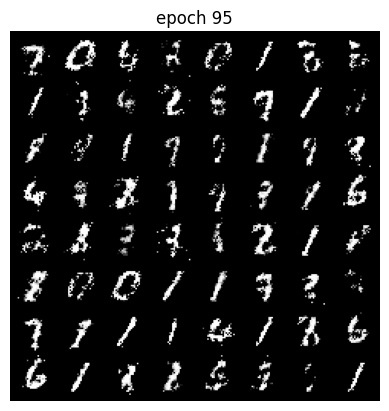

Epoch 95 of 100
Generator loss: 2.42676043, Discriminator loss: 0.59213268


469it [00:13, 35.63it/s]                         


Epoch 96 of 100
Generator loss: 2.33332308, Discriminator loss: 0.62804908


469it [00:13, 35.58it/s]                         


Epoch 97 of 100
Generator loss: 2.30356622, Discriminator loss: 0.62303692


469it [00:14, 32.31it/s]                         


Epoch 98 of 100
Generator loss: 2.35939193, Discriminator loss: 0.60476758


469it [00:14, 32.19it/s]                         


Epoch 99 of 100
Generator loss: 2.40250361, Discriminator loss: 0.62054509


469it [00:14, 32.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


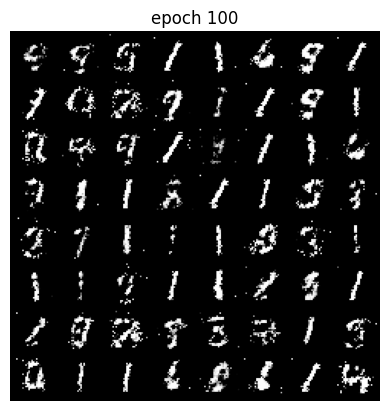

Epoch 100 of 100
Generator loss: 2.34997645, Discriminator loss: 0.61854451


In [59]:
torch.manual_seed(7777)


def generator_loss(output, true_label):
    return criterion(output, true_label)
    
# not sure if I'm implementing this in the intended way ...
def discriminator_loss(output, true_label):
    return criterion(output,true_label)
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/batch_size)):
        # discriminator on real images
        # log (D(x))
        discriminator.zero_grad()
        real_images = data[0].to(device)
        labels_real = label_real(real_images.size(0))
        output_real = discriminator(real_images)
        loss_real = discriminator_loss(output_real, labels_real)
        
        # discriminator on fake images
        # log(1-D(G(z)))
        noise = create_noise(real_images.size(0), nz)
        fake_images = generator(noise)
        labels_fake = label_fake(fake_images.size(0))
        output_fake = discriminator(fake_images.detach())
        loss_fake = discriminator_loss(output_fake, labels_fake)
        
        # train discriminator
        d_loss = loss_real + loss_fake
        d_loss.backward()
        optim_d.step()
        
        # train generator
        for step in range(k):
            generator.zero_grad()
            noise = create_noise(sample_size, nz)
            fake_images = generator(noise)
            output = discriminator(fake_images)
            labels = label_real(sample_size)
            g_loss = generator_loss(output, labels)


            g_loss.backward()
            optim_g.step()
        
        loss_g += g_loss.item()
        loss_d += d_loss.item()
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [60]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [61]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

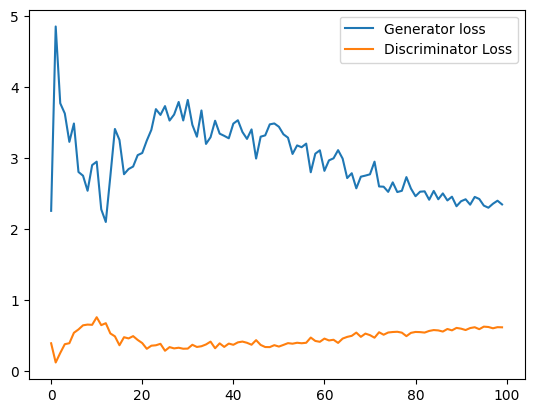

In [62]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')